WeatherPy
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude
Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number, city name, and requested URL.
Save both a CSV of all data retrieved and png images for each scatter plot.
As final considerations:

You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
See Example Solution for a reference on expected format.
Hints and Considerations
You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the geographic coordinate system.

Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

Though we've never worked with the citipy Python library, push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

# Observations
- There is a direction correlation between latitude and maximum temperature. The farther away from 0 latitude, the lower the max temperature for a city
- Humidity appears to increase as a city draws closer to 0 latitude up to a limit.
- city windspeeds appear to increase the farther away a city is from latitude 0

In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import seaborn as sns
import pandas as pd
import json
import numpy as np
from citipy import citipy

In [2]:
%matplotlib inline

In [3]:
# Save config information.
api_key = "2a0e8e14dd60d3518271c5f0803eaf63"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [4]:
#Randomly select 500+ cities
random_lat = []
random_lon = []
cities = []
country_code = []
name = []
weather_json = []
weather_dict = {}
for x in range (1400):
    random_lat = np.random.uniform(low=-90, high=90, size=1)
    random_lon =np.random.uniform(low=-180, high=180, size=1)
    cityname = citipy.nearest_city(random_lat, random_lon)
    if cityname not in cities:
        cities.append(cityname)
print(len(cities))
    

608


In [5]:
#Report on pulled data
c=1
for city in cities:
    name.append(city.city_name)
    country_code.append(city.country_code)
    response = req.get(query_url+city.city_name).json()
    print("Processing Record "+str(c)+" of "+ str(len(cities))+" "+query_url+city.city_name)
    weather_json.append(response)
    c +=1
    
print("-"*100)
print("                Data Retrieval Complete")
print("-"*100)

Processing Record 1 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=bredasdorp
Processing Record 2 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=kuna
Processing Record 3 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=petrovec
Processing Record 4 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=ahipara
Processing Record 5 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=belleville
Processing Record 6 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=cape town
Processing Record 7 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=busselton
Processing Record 8 of 608

Processing Record 60 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=qaanaaq
Processing Record 61 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=dikson
Processing Record 62 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=mocambique
Processing Record 63 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=chifeng
Processing Record 64 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=belushya guba
Processing Record 65 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=puerto del rosario
Processing Record 66 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=qianan
Processin

Processing Record 119 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=iqaluit
Processing Record 120 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=buluang
Processing Record 121 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=sinkat
Processing Record 122 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=udachnyy
Processing Record 123 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=marcona
Processing Record 124 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=cukai
Processing Record 125 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=praia
Processing Record 126 of

Processing Record 177 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=boa vista
Processing Record 178 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=newport
Processing Record 179 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=port elizabeth
Processing Record 180 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=ginir
Processing Record 181 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=attawapiskat
Processing Record 182 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=port hardy
Processing Record 183 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=husavik
Proce

Processing Record 235 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=dryden
Processing Record 236 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=hasaki
Processing Record 237 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=brae
Processing Record 238 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=thompson
Processing Record 239 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=mehamn
Processing Record 240 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=evensk
Processing Record 241 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=lolua
Processing Record 242 of 608

Processing Record 293 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=tamandare
Processing Record 294 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=parambu
Processing Record 295 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=kurunegala
Processing Record 296 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=loikaw
Processing Record 297 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=torres
Processing Record 298 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=ancud
Processing Record 299 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=cap malheureux
Processing R

Processing Record 352 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=lashio
Processing Record 353 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=cockburn town
Processing Record 354 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=sao joao da barra
Processing Record 355 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=naldurg
Processing Record 356 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=goderich
Processing Record 357 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=elizabeth city
Processing Record 358 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=snezh

Processing Record 410 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=chebarkul
Processing Record 411 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=zyryanka
Processing Record 412 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=aksarka
Processing Record 413 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=sao jose da coroa grande
Processing Record 414 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=kahului
Processing Record 415 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=isangel
Processing Record 416 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=guangyua

Processing Record 468 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=qinhuangdao
Processing Record 469 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=bambanglipuro
Processing Record 470 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=shaoyang
Processing Record 471 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=pincher creek
Processing Record 472 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=castanos
Processing Record 473 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=honiara
Processing Record 474 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=kilindoni


Processing Record 527 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=isla mujeres
Processing Record 528 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=buhovo
Processing Record 529 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=khandyga
Processing Record 530 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=pilot butte
Processing Record 531 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=berlevag
Processing Record 532 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=saint george
Processing Record 533 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=balykshi
Proc

Processing Record 585 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=san jeronimo
Processing Record 586 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=auch
Processing Record 587 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=roald
Processing Record 588 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=saint simons
Processing Record 589 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=aksay
Processing Record 590 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=mapiripan
Processing Record 591 of 608 http://api.openweathermap.org/data/2.5/weather?appid=2a0e8e14dd60d3518271c5f0803eaf63&units=imperial&q=bell ville
Processing R

In [7]:
#Fill data into DataFrame
lat_data = []
temp_data = []
city_data = []
country = []
Humi_data = []
cld_data = []
wind_data = []
long_data = []
temp_max = []
for data in weather_json:
    try:
        lat1 = data.get("coord").get("lat")
        lat_data.append(lat1)
        temp1 = data.get("main").get("temp")
        temp_data.append(temp1)
        city1 = data.get("name")
        city_data.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
        Humi1 = data.get("main").get("humidity")
        Humi_data.append(Humi1)
        cld1 = data.get("clouds").get("all")
        cld_data.append(cld1)
        wind1 = data.get("wind").get("speed")
        wind_data.append(wind1)
        long1 = data.get("coord").get("lon")
        long_data.append(long1)
        temp1 = data.get("main").get("temp_max")
        temp_max.append(temp1)

    except:
        pass

    continue

weather_dict = {"Temperature (F)": temp_data, "Latitude": lat_data, "Longitude":long_data, "city":city_data, "Country":country,
                "Humidity": Humi_data, "Cloudiness":cld_data,"Wind Speed":wind_data, "Max_Temp":temp_max}
weather_df = pd.DataFrame(weather_dict)
weather_df.set_index("city", inplace=True)
weather_df

,Cloudiness,Country,Humidity,Latitude,Longitude,Max_Temp,Temperature (F),Wind Speed
city,,,,,,,,
Bredasdorp,88,ZA,100,-34.53,20.04,65.87,65.87,12.33
Kuna,90,US,59,43.49,-116.42,35.60,34.65,13.87
Petrovec,20,MK,84,41.94,21.61,6.80,6.80,2.15
Ahipara,20,NZ,78,-35.17,173.16,72.21,72.21,14.00
Belleville,40,CA,86,44.16,-77.39,37.40,37.40,8.05
Cape Town,20,ZA,82,-33.93,18.42,64.40,64.40,9.17
Busselton,0,AU,79,-33.64,115.35,77.03,77.03,15.46
Atuona,92,PF,100,-9.80,-139.03,80.27,80.27,19.04
Sola,0,FI,83,62.78,29.36,-9.41,-9.41,2.24


In [8]:
#Save DataFrame to CSV
weather_df.to_csv("my_weather.csv",encoding="utf-8",index=False)

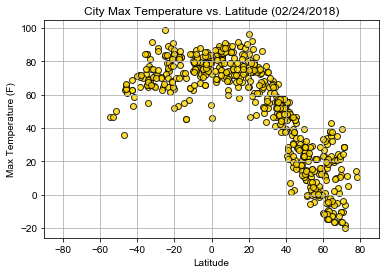

In [9]:
plt.scatter(weather_df["Latitude"], 
            weather_df["Max_Temp"], c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Temp")

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude (02/24/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
sns.set()
plt.savefig("Temperature (F) vs. Latitude.png")
plt.show()

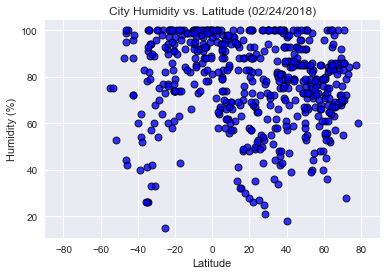

In [10]:
plt.scatter(weather_df["Latitude"], 
            weather_df["Humidity"], c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Humidity")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (02/24/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
sns.set()
plt.savefig("Humidity (%) vs. Latitude.png")
plt.show()

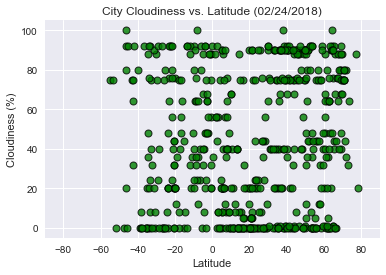

In [11]:
plt.scatter(weather_df["Latitude"], 
            weather_df["Cloudiness"], c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cloudiness")

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude (02/24/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
sns.set()
plt.savefig("Cloudiness (%) vs. Latitude.png")
plt.show()

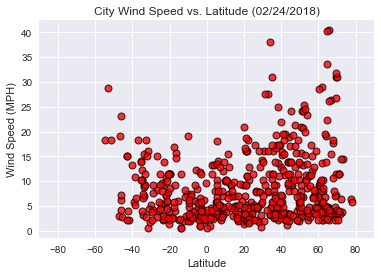

In [12]:

plt.scatter(weather_df["Latitude"], 
            weather_df["Wind Speed"], c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="wind speed")

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude (02/24/2018)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
sns.set()
plt.savefig("Wind Speed (MPH) vs. Latitude.png")
plt.show()